#INTRODUCTION

**About Dataset**

This data set contains records relevant to a direct marketing campaign of a Portuguese banking institution. The marketing campaign was executed through phone calls. Often, more than one call needs to be made to a single client before they either decline or agree to a term deposit subscription. The classification goal is to predict if the client will subscribe (yes/no) to the term deposit (variable y).

This bank marketing data set is originally shared in the UCI Machine Learning Repository https://archive.ics.uci.edu/dataset/222/bank+marketing.

Term deposits are cash investment held at a financial institution and are a major source of revenue for banks--making them important for financial institutions to market. Telemarketing remains to be a popular marketing technique because of the potential effectiveness of human-to-human contact provided by a telephone call, which is sometimes quite the opposite of many impersonal and robotic marketing messages relayed through social and digital media.

How can the banking institution have more effective direct marketing campaigns in the future? Analyze this data set and identify the patterns that will help bank develop future strategies.

**Input variables:**

bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

other attributes:

11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13 - previous: number of contacts performed before this campaign and for this client (numeric)

14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes:

15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

16 - cons.price.idx: consumer price index - monthly indicator (numeric)

17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

18 - euribor3m: euribor 3 month rate - daily indicator (numeric)

19 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

20 - y - has the client subscribed a term deposit? (binary: 'yes','no')

#Importing the libraries & the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
!pip install -q imblearn
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
!pip install -q xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', delimiter=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
# Keeping an original copy
df_orig = df.copy()

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**There are no null values present in the dataset**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#EDA

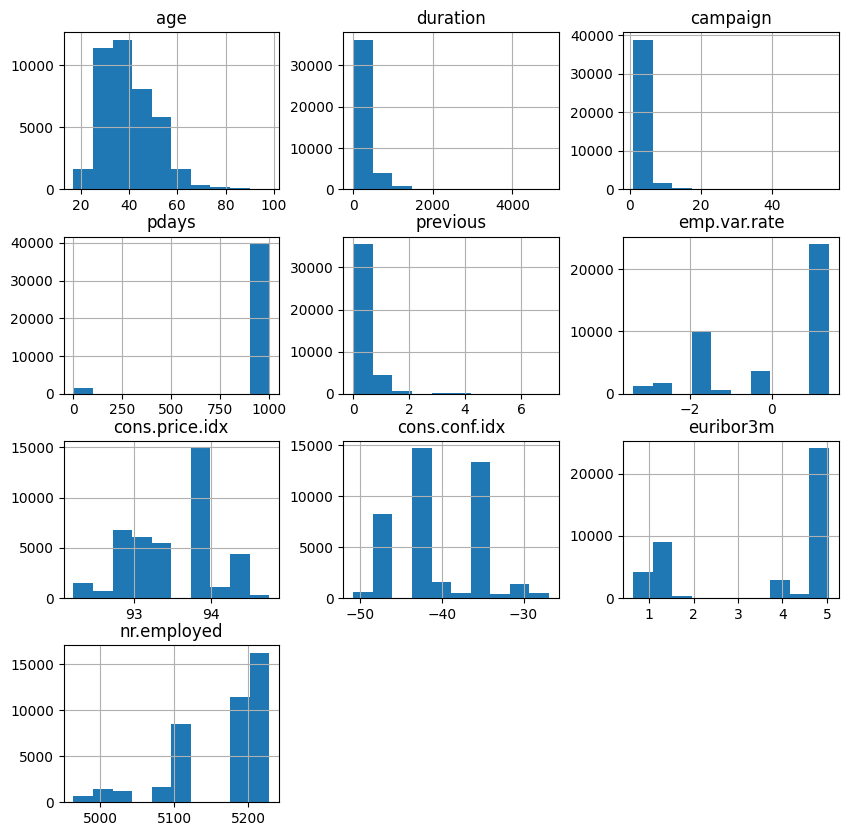

In [ ]:
df.hist(figsize=(10,10));

The columns - age, duration, campaign, previous are right skewed & the columns - pdays, emp.var.rate, euribor3m, nr.employed are left skewed. The other columns - cons.price.idx and cons.conf.idx are normally distributed


In [ ]:
# Lets check the distribution of the values in the different categorical columns
for column in df.select_dtypes(include='object'):
  print(df[column].value_counts(),'\n-----------------------------')

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 
-----------------------------
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 
-----------------------------
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 
-----------------------------
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 
-----------------------------
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 
-------------------------

It appears that some features have unknown values in them. We would have dropped those values but the number of such instances are higher in some of the columns. We would therefore chose not to interfere with such values. Let these unknown values be chosen as a separate value by the machine learning algorithm.

In [ ]:
df.select_dtypes(include='number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
df.select_dtypes(include='number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

We are checking two kind of pairplots for numerical values - first for Bank client data & the second for social and economic context attributes to understand the interdepency and also the correlation with the output class

**1. Bank client data pairplot:**

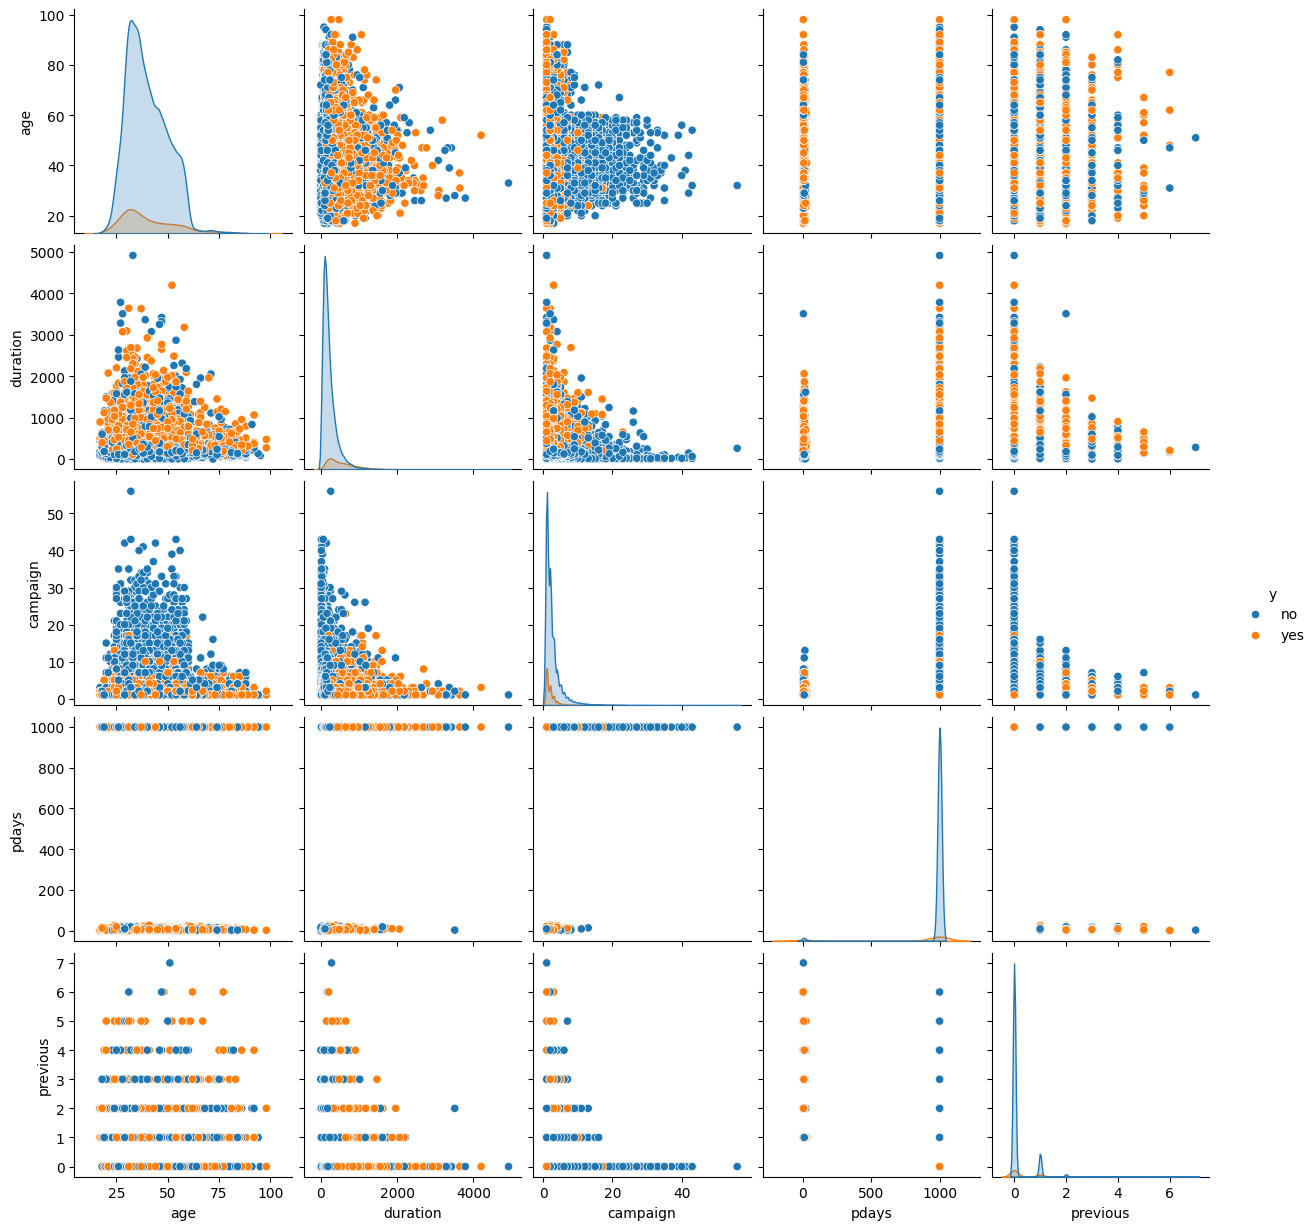

In [ ]:
sns.pairplot(data=df[['age', 'duration', 'campaign', 'pdays', 'previous', 'y']], hue='y')

**2. social and economic context attributes pairplot:**

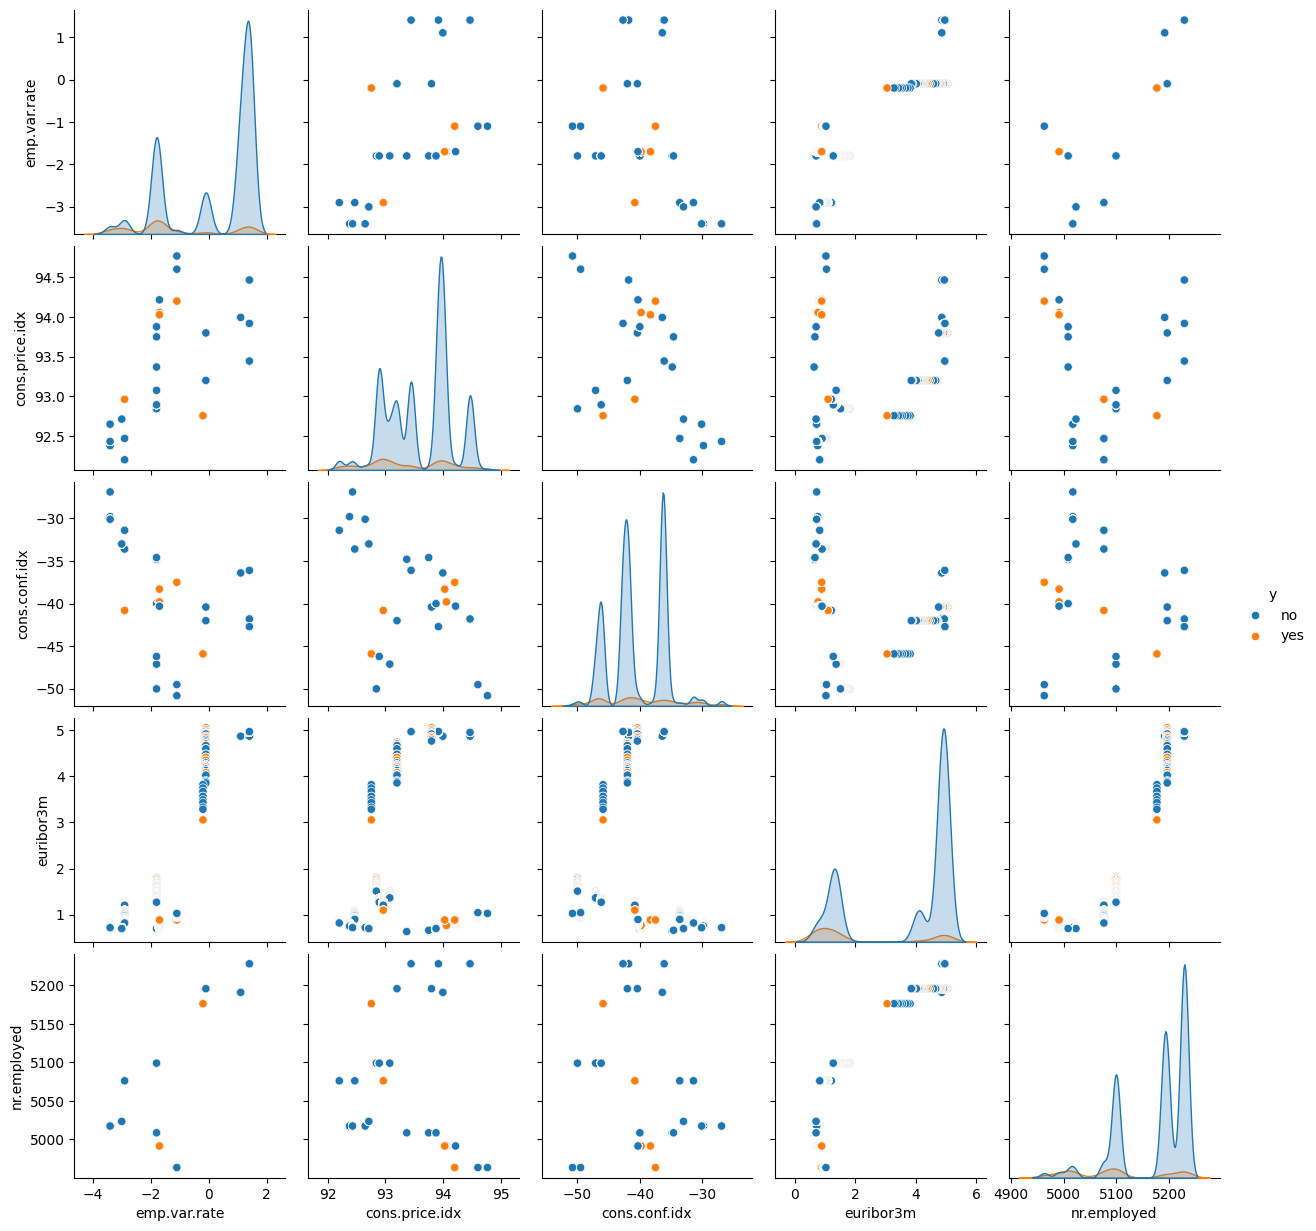

In [ ]:
sns.pairplot(data=df[['emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']], hue='y')

**Call Duration vs Campaign**

Text(0.5, 1.0, 'Call Duration vs Campaign')

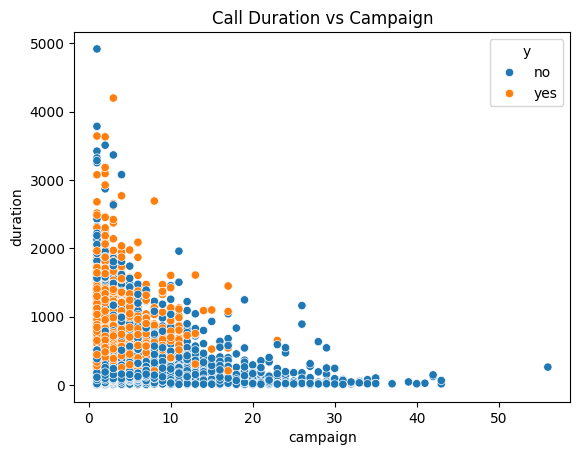

In [ ]:
sns.scatterplot(data=df, x='campaign', y='duration', hue='y')
plt.title('Call Duration vs Campaign')

- It is the most important correlation that we saw amongst the above pairplots. The call duration drops with increasing number of campaigns for the different customers.
- It is very obvious for the call duration to drop with increasing no of campaigns but we can see that during the initial stages of the campaign when the customers agrees on hearing the bank employees a lot more, the customers agree for term deposit. But as the no. of campaigns increases, the customer success goes on decreasing
- One insight from this is that more number of campaigns do not guarantee success. In fact, most of the success has taken place within the first 20 campaigns. So the bank can decide on limiting the number of campaigns to max 20 for improved efficiency of its employees.

**Lets check what kind of people are more likely to submit term deposit:**

In [ ]:
df2 = df.copy()

In [ ]:
df2['y'].replace({'yes':1, 'no':0}, inplace=True)

In [ ]:
for i in df2.select_dtypes(include='object').columns:
  print(df2.groupby(i)['y'].mean().sort_values(ascending=False),'\n-----------------------------')

job
student          0.314286
retired          0.252326
unemployed       0.142012
admin.           0.129726
management       0.112175
unknown          0.112121
technician       0.108260
self-employed    0.104856
housemaid        0.100000
entrepreneur     0.085165
services         0.081381
blue-collar      0.068943
Name: y, dtype: float64 
-----------------------------
marital
unknown     0.150000
single      0.140041
divorced    0.103209
married     0.101573
Name: y, dtype: float64 
-----------------------------
education
illiterate             0.222222
unknown                0.145003
university.degree      0.137245
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y, dtype: float64 
-----------------------------
default
no         0.12879
unknown    0.05153
yes        0.00000
Name: y, dtype: float64 
-----------------------------
housing
yes        0.116194
no         0.

**Lets visualize the above information in the form of chart**

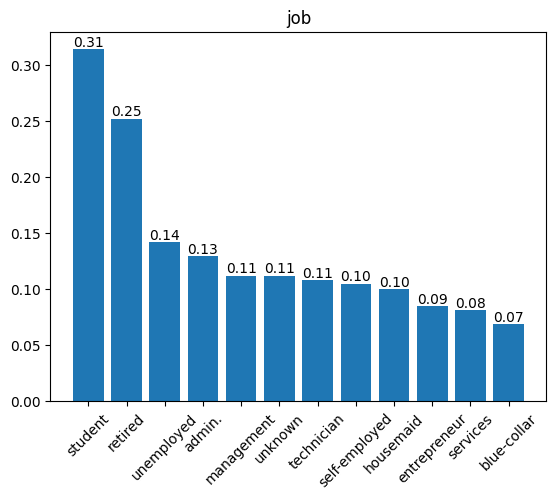

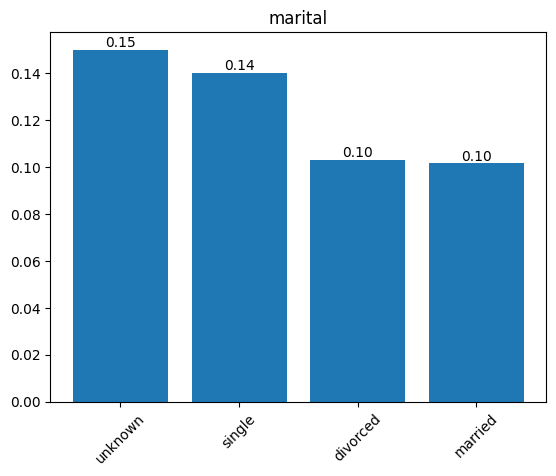

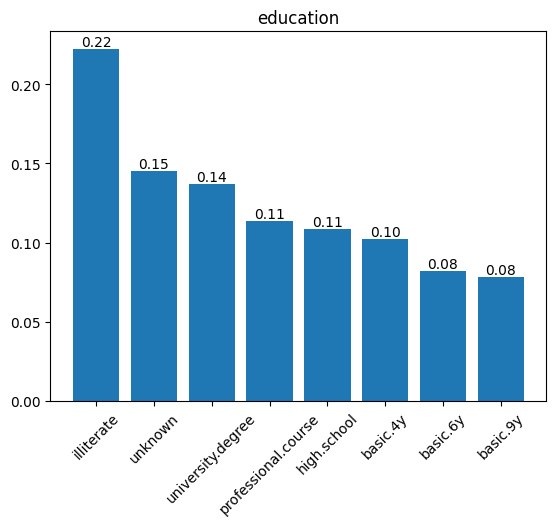

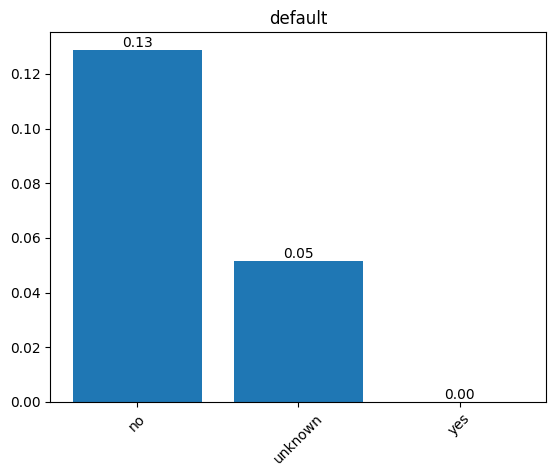

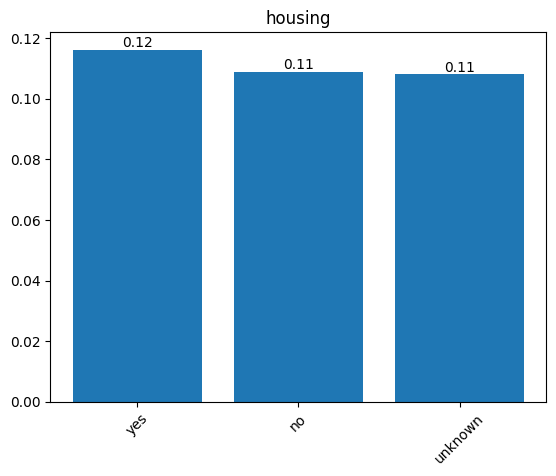

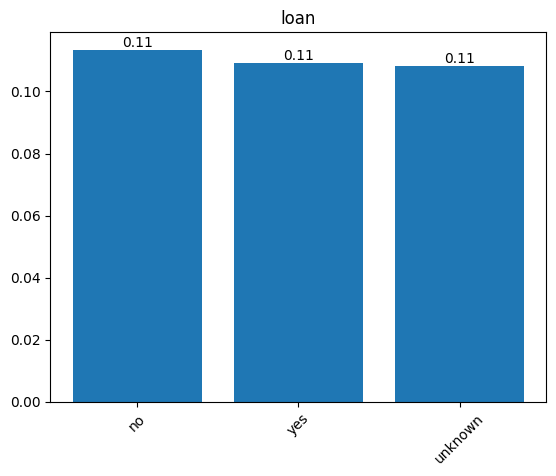

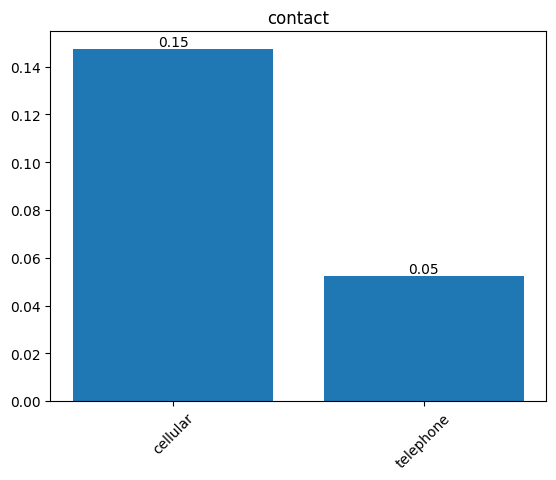

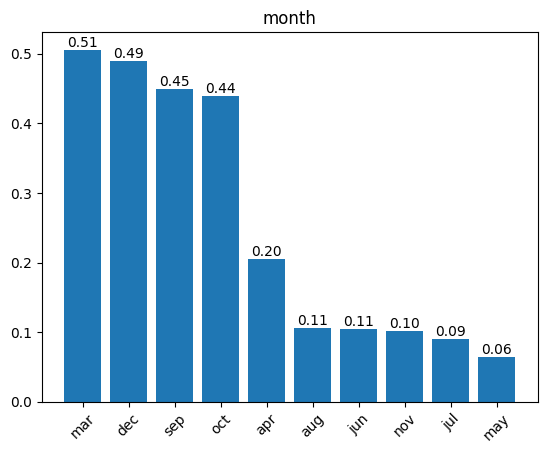

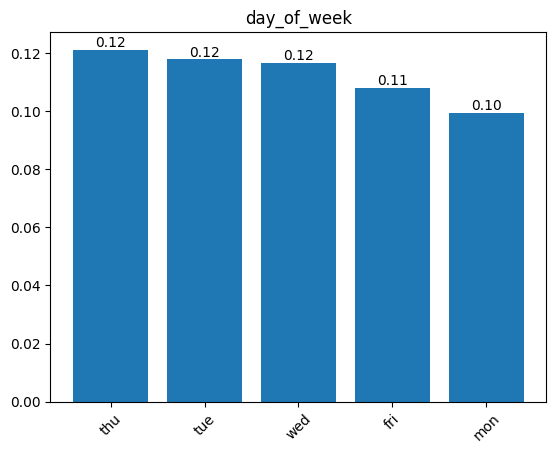

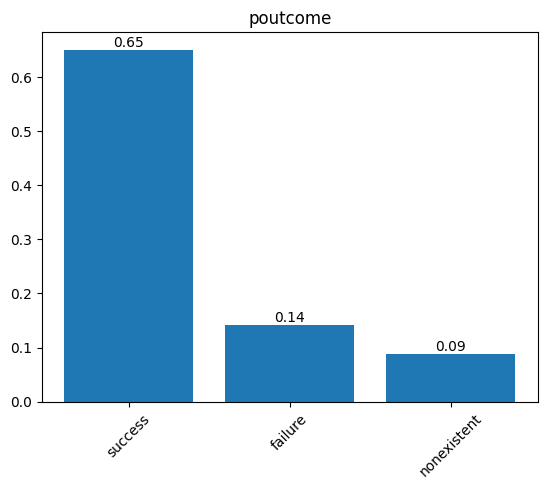

In [ ]:
for i in df2.select_dtypes(include='object').columns:
  k = df2.groupby(i)['y'].mean().sort_values(ascending=False)
  plt.title(i)
  plt.bar(k.index, k.values)
  for i, value in enumerate(k.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
  plt.xticks(rotation=45)
  plt.show();

- Job wise - students and retired people have higher success at 31% & 25% respectively
- Single people are more likely to submit term deposit than married & divorced people (14% against 10%)
- Education wise illeterate people are more likely to submit term deposit than the rest (22%)
- People who do not have any current default are more likely to submit term deposit
- People who are contacted on their cellphones show better success compared to those who are contacted on telephone



**Effect of age on term deposit**

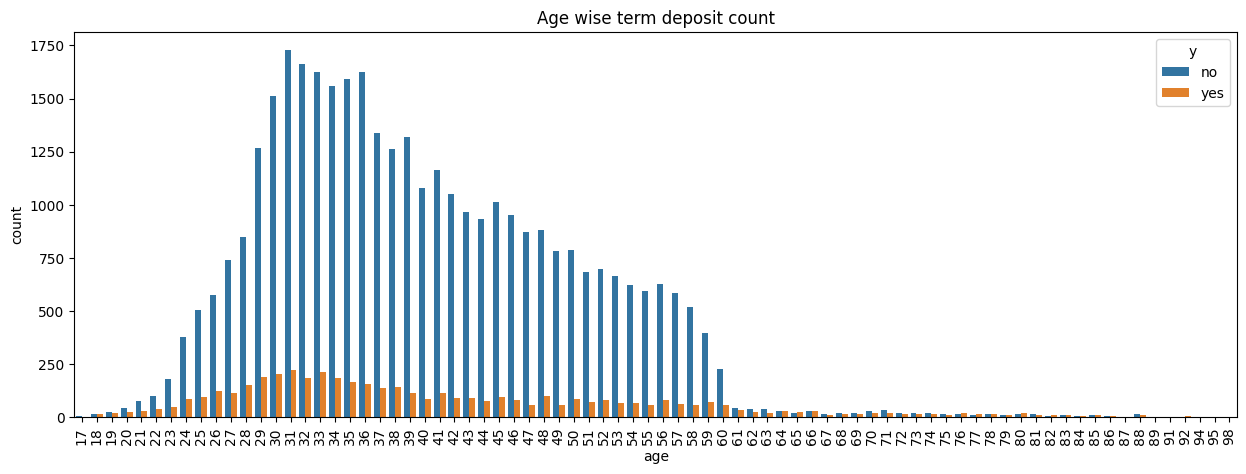

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='age', hue='y')
plt.title('Age wise term deposit count')
plt.xticks(rotation=90);


From the above graph, it is visible that the maximum customers are from 30-35 age segment. Both the types of customers (who say yes & no) are high in this age segment. But it is unclear what PERCENTAGE of people actually submit the term deposit.

**Age wise % submission:**

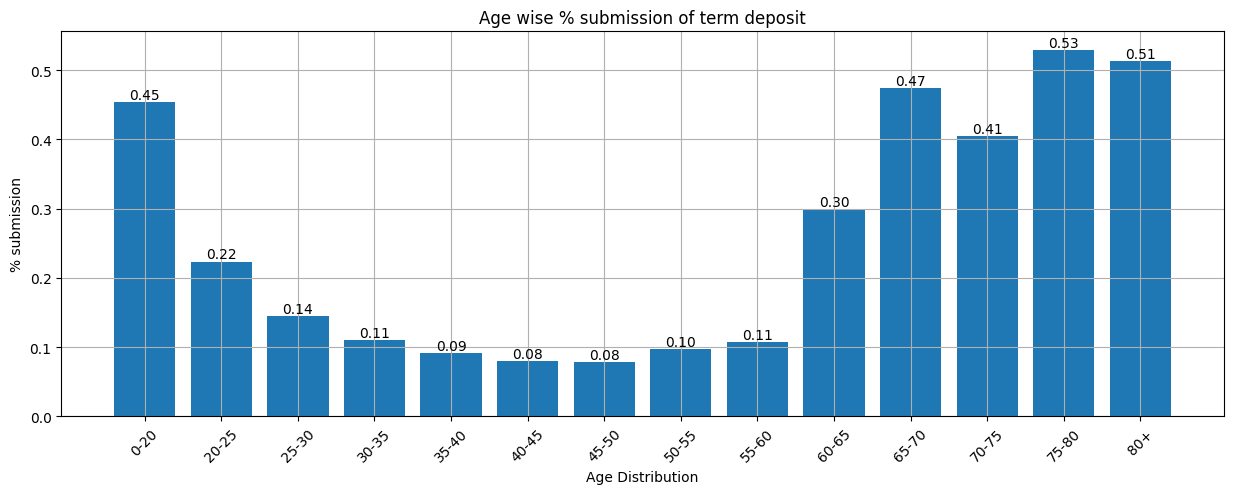

In [ ]:
df2['age2'] = df2['age']
df2['age2'] = np.where(df2['age']<20,'0-20',df2['age2'])
df2['age2'] = np.where((df2['age']>=20) & (df2['age']<25), '20-25', df2['age2'])
df2['age2'] = np.where((df2['age']>=25) & (df2['age']<30), '25-30', df2['age2'])
df2['age2'] = np.where((df2['age']>=30) & (df2['age']<35), '30-35', df2['age2'])
df2['age2'] = np.where((df2['age']>=35) & (df2['age']<40), '35-40', df2['age2'])
df2['age2'] = np.where((df2['age']>=40) & (df2['age']<45), '40-45', df2['age2'])
df2['age2'] = np.where((df2['age']>=45) & (df2['age']<50), '45-50', df2['age2'])
df2['age2'] = np.where((df2['age']>=50) & (df2['age']<55), '50-55', df2['age2'])
df2['age2'] = np.where((df2['age']>=55) & (df2['age']<60), '55-60', df2['age2'])
df2['age2'] = np.where((df2['age']>=60) & (df2['age']<65), '60-65', df2['age2'])
df2['age2'] = np.where((df2['age']>=65) & (df2['age']<70), '65-70', df2['age2'])
df2['age2'] = np.where((df2['age']>=70) & (df2['age']<75), '70-75', df2['age2'])
df2['age2'] = np.where((df2['age']>=75) & (df2['age']<80), '75-80', df2['age2'])
df2['age2'] = np.where((df2['age']>=80) , '80+', df2['age2'])

plt.figure(figsize=(15,5))
plt.grid()
j = df2.groupby('age2')['y'].mean()
plt.bar(j.index, j.values)
for i, value in enumerate(j.values):
    plt.text(i, value, f'{value:.2f}', ha='center', va='bottom')
plt.title('Age wise % submission of term deposit')
plt.xlabel('Age Distribution')
plt.ylabel('% submission')
plt.xticks(rotation=45);

- This is the most interesting insight: The percentage of people submitting the term deposit are higher in the end regions i.e. very young people & old people easily submit the term deposit.
- This percentage is the lowest at 40-45 age.

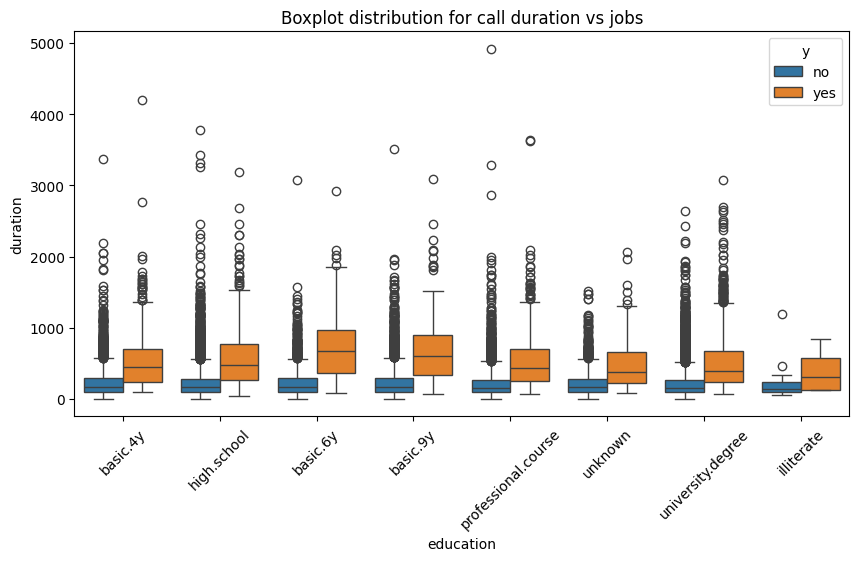

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='education', y='duration', hue='y')
plt.title('Boxplot distribution for call duration vs jobs')
plt.xticks(rotation=45);

- Average duration for successful calls are on the higher side as compared to the non-successful calls
- As already seen above, illeterate people show good success, but they also need the least time for convincing amongst all

In [ ]:
df.groupby('month')['duration'].sum()

month
apr     771704
aug    1435957
dec      62901
jul    1961559
jun    1289941
mar     134287
may    3596900
nov    1008254
oct     207048
sep     169692
Name: duration, dtype: int64

- May month has the highest number of calls attempted followed by Jul and Aug. This is probably beacuse the camapign would have started during that time

#Data Preprocessing

**Outlier removal**

In [ ]:
df.select_dtypes('number')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [ ]:
df.select_dtypes('number').columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
from scipy import stats

# Creating a new DataFrame to store data
new_df = df.copy()

# Defining columns containing numerical data
numerical_columns = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
# we are not taking 'pdays' here, as all the values except 999, will be connsidered as outlier and will be removed

# Calculating z-scores for numerical columns
z_scores = stats.zscore(new_df[numerical_columns])

# Defining a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Finding and removing rows with outliers
outlier_indices = ((z_scores > threshold) | (z_scores < -1*threshold)).any(axis=1)
df = df[~outlier_indices]

# Reseting index of the new DataFrame
df.reset_index(drop=True, inplace=True)

# Now df contains data without outliers

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38118,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
38119,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
38120,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
38121,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [ ]:
# Here the value 999 means that the customer is contacted for the first time. The value 999 appears as an outlier, therefore we are changing it
df['pdays'].replace({999:100}, inplace=True)

In [ ]:
df['pdays'].value_counts()

pdays
100    37314
3        232
6        204
4         69
2         41
12        37
10        36
5         26
9         26
7         25
13        20
11        19
1         16
15        13
14        12
16         9
8          7
0          7
22         3
18         2
17         2
26         1
27         1
19         1
Name: count, dtype: int64

**Encoding**

In [ ]:
df.select_dtypes(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
38118,admin.,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,yes
38119,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,success,no
38120,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
38121,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no


- The columns job, marital, default, housing, loan, contact poutcome do not have ordinal data so they can be directly encoded
- while the columns education, month, day_of_week has to be ordinally encoded

**a. Encoding non-ordinal data:**

In [ ]:
lb_job = LabelEncoder()
lb_marital = LabelEncoder()
lb_default = LabelEncoder()
lb_housing = LabelEncoder()
lb_loan = LabelEncoder()
lb_contact = LabelEncoder()
lb_poutcome = LabelEncoder()

In [ ]:
df['job']=lb_job.fit_transform(df['job'])
df['marital']=lb_marital.fit_transform(df['marital'])
df['default']=lb_default.fit_transform(df['default'])
df['housing']=lb_housing.fit_transform(df['housing'])
df['loan']=lb_loan.fit_transform(df['loan'])
df['contact']=lb_contact.fit_transform(df['contact'])
df['poutcome']=lb_poutcome.fit_transform(df['poutcome'])
df['y'] = df['y'].map({'yes':1, 'no':0})

**b. Encoding ordinal data:**

In [ ]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
df.education.replace({'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'unknown':4,'high.school':5,'professional.course':6,'university.degree':7}, inplace=True)

In [ ]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [ ]:
df.month.replace({'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,
       'sep':9}, inplace=True)

In [ ]:
df.day_of_week.unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [ ]:
df.day_of_week.replace({'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}, inplace=True)

**Properly Encoded Data:**

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,1,0,0,0,1,5,1,...,1,100,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,5,1,0,0,1,5,1,...,1,100,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,5,0,2,0,1,5,1,...,1,100,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,2,0,0,0,1,5,1,...,1,100,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,5,0,0,2,1,5,1,...,1,100,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38118,37,0,1,7,0,2,0,0,11,5,...,1,100,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
38119,29,10,2,1,0,2,0,0,11,5,...,1,9,1,2,-1.1,94.767,-50.8,1.028,4963.6,0
38120,46,1,1,6,0,0,0,0,11,5,...,1,100,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
38121,56,5,1,7,0,2,0,0,11,5,...,2,100,0,1,-1.1,94.767,-50.8,1.028,4963.6,0


#Feature Selection

**Lets first see the correlation amongst the various categories**

<Axes: >

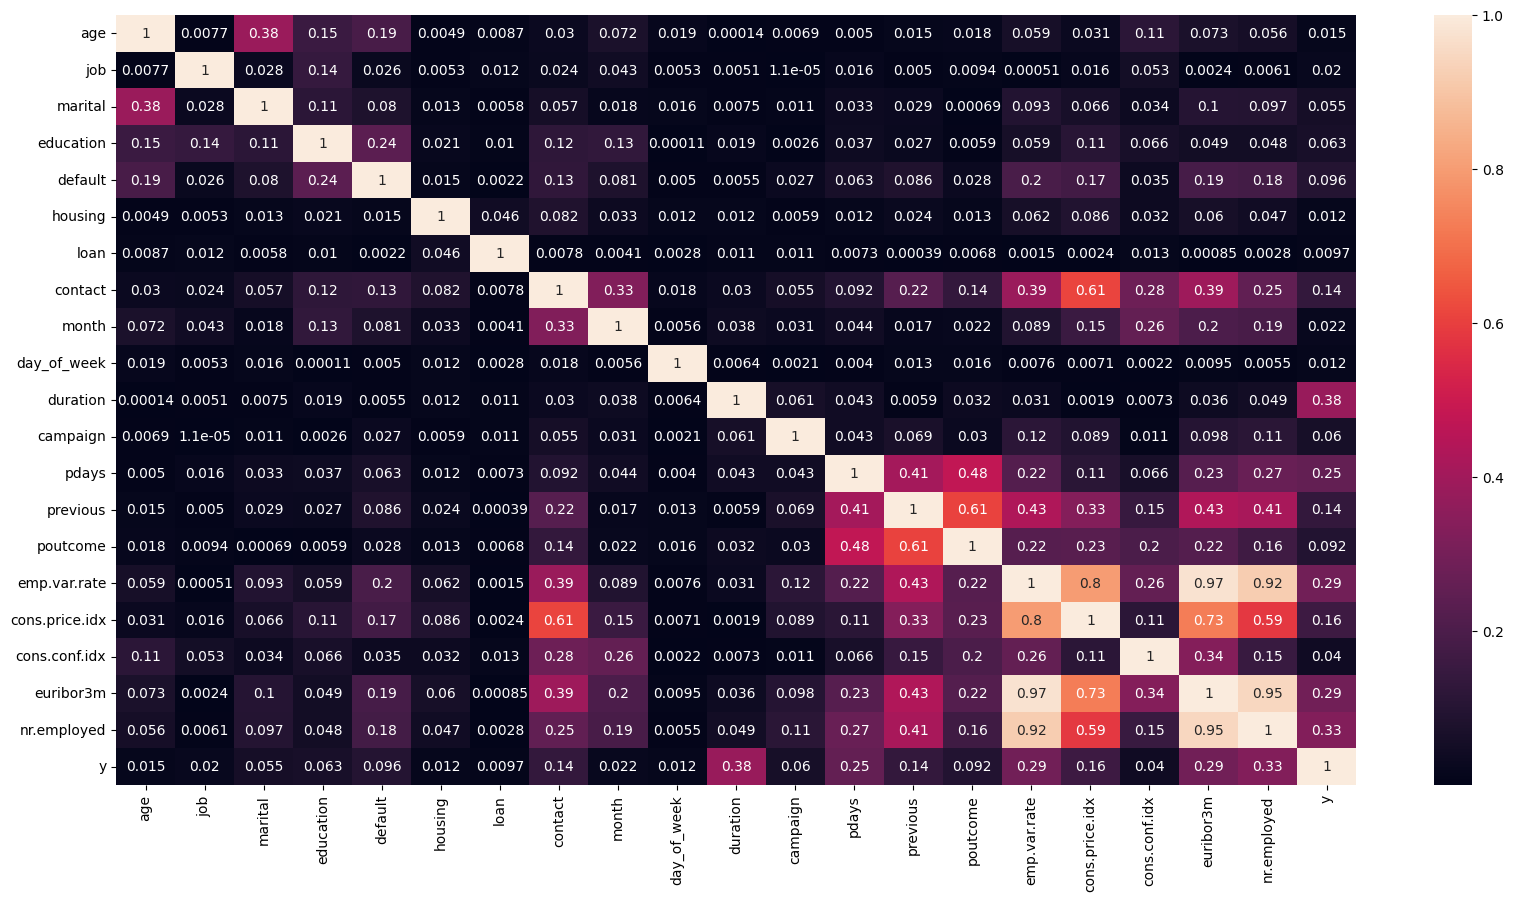

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(abs(df.corr()), annot=True)

The features that show high correlation with the output class are - duration, pdays, previous, emp.var.rate., euribor3m & nr.employed. But some of these features show strong correlation amongst themselves also like euribor3m, nr.employed and emp.var.rate. To directly filter the features according to the correlation would not be right as it may cause multicollinearity issues.

**For proper feature selection, we will use Feature importance technique**

In [ ]:
X = df.iloc[:,:-1]
y = df['y']
model = ExtraTreesClassifier()
model.fit(X, y)
score = model.feature_importances_

In [ ]:
# Ranked features according to Feature Importance:
ranked_features = pd.Series(score, index=X.columns)
ranked_features.sort_values(ascending=False)

duration          0.256067
euribor3m         0.099235
age               0.091881
job               0.062458
campaign          0.059332
education         0.057504
nr.employed       0.054878
day_of_week       0.053146
marital           0.037187
emp.var.rate      0.030112
housing           0.029280
cons.conf.idx     0.027946
pdays             0.026173
loan              0.021402
cons.price.idx    0.020457
month             0.020299
poutcome          0.020236
contact           0.014175
default           0.011549
previous          0.006682
dtype: float64

In [ ]:
ranked_features.sort_values(ascending=False)[:10].index

Index(['duration', 'euribor3m', 'age', 'job', 'campaign', 'education',
       'nr.employed', 'day_of_week', 'marital', 'emp.var.rate'],
      dtype='object')

In [ ]:
# dropping the less important features
df.drop(columns=ranked_features.sort_values(ascending=False)[10:].index, inplace=True)

In [ ]:
df[:4]

,age,job,marital,education,day_of_week,duration,campaign,emp.var.rate,euribor3m,nr.employed,y
0,56,3,1,1,1,261,1,1.1,4.857,5191.0,0
1,57,7,1,5,1,149,1,1.1,4.857,5191.0,0
2,37,7,1,5,1,226,1,1.1,4.857,5191.0,0
3,40,0,1,2,1,151,1,1.1,4.857,5191.0,0


This is a properly encoded dataset with required features only that we can further use for data modelling

#Class Balancing : SMOTE

**There is a massive imbalance between the two output classes due to which we will face the problem of poor performance on minority class. To solve this problem we will use SMOTE (Synthetic Minority Over-sampling Technique)**

<Axes: xlabel='y', ylabel='count'>

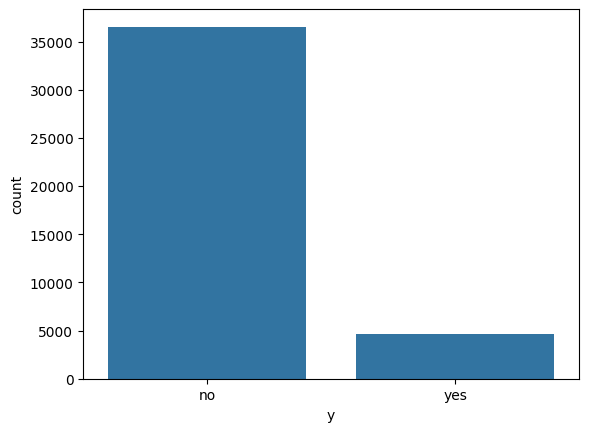

In [ ]:
sns.countplot(x=df_orig['y'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['y'], test_size=0.2, random_state=27)

In [ ]:
X_train.shape

(30498, 10)

In [ ]:
X_test.shape

(7625, 10)

In [ ]:
y_train.shape

(30498,)

In [ ]:
y_test.shape

(7625,)

In [ ]:
# Resample the dataset according to the classes
sm = SMOTE(random_state=27)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_res.shape

(55482, 10)

In [ ]:
print(sum(y_train_res==1), sum(y_train_res==0))

27741 27741


In [ ]:
y_train[y_train==1].sum()/len(y_train)

0.09039937045052135

In [ ]:
y_test[y_test==1].sum()/len(y_test)

0.0899672131147541

# Model fitting

**Random Forest**

In [ ]:
RF = RandomForestClassifier()

In [ ]:
RF.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [ ]:
RF.score(X_train_res, y_train_res)

0.9999819761364046

In [ ]:
y_pred = RF.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6467,  472],
       [ 220,  466]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      6939
           1       0.50      0.68      0.57       686

    accuracy                           0.91      7625
   macro avg       0.73      0.81      0.76      7625
weighted avg       0.92      0.91      0.92      7625



#Hyperparameter Tuning

In [ ]:
params = {
    'n_estimators' : [100,200,500],
    'criterion': ['gini', 'entropy']
}

In [ ]:
RF = RandomForestClassifier()
clf = GridSearchCV(
    estimator=RF,
    param_grid=params,
    cv=5
)

In [ ]:
clf.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 500]})

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [ ]:
clf.score(X_train_res, y_train_res)

0.9999819761364046

In [ ]:
clf.score(X_test, y_test)

0.9169836065573771

In [ ]:
y_pred2 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      6939
           1       0.53      0.68      0.60       686

    accuracy                           0.92      7625
   macro avg       0.75      0.81      0.77      7625
weighted avg       0.93      0.92      0.92      7625



# ROC Curve

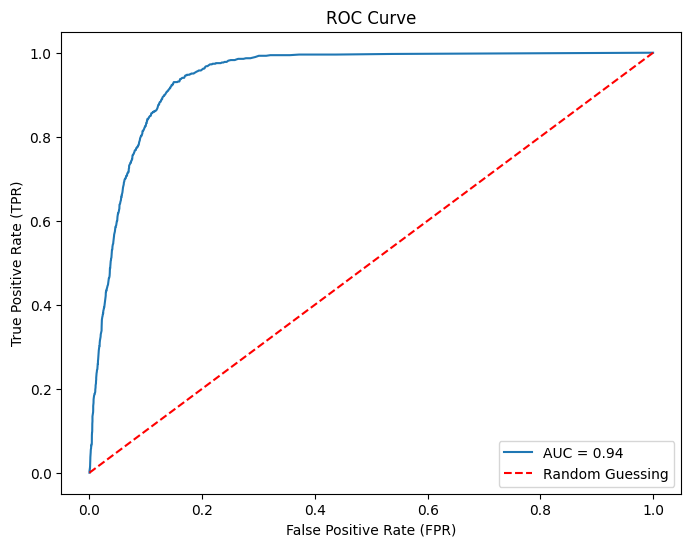

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred2 = clf.predict_proba(X_test)[:, 1]  # Probability of positive class

# Computing ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred2)

# Calculating AUC
auc = roc_auc_score(y_test, y_pred2)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'r--', label="Random Guessing")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend()
plt.show()

#CONCLUSION

- From the EDA, we concluded that the maximum number of campaigns can be capped to improve the employees efficiency
- Need a strategy for mid-age people : they tend to ignore term deposit submission more
- Our model used Random Forest Classifer algorithm which shows good performance on unseen data and predicts at 92% accuracy & AUC performance of 94%
- This model can be used for customer profiling as it can help the bank employees predict in advance the likelihood of a call being successful.
- The bank should decide on strategies for customers showing less success probability